# Image classification with Convolutional Neural Networks using Keras

Adapted from https://github.com/CShorten/KaggleDogBreedChallenge

In [ ]:
%matplotlib inline

In [38]:
# Read and preprocess the images

from pathlib import Path
from PIL import Image
import numpy as np

dogs_and_cats_images_path = Path("DogsAndCatsImages")
IMG_HEIGHT = IMG_WIDTH = 300  # Resize all the images to a square for consistency

def read_images(*, dataset: str, file_stem: str, start_i: int, stop_i: int):
    images = []
    for i in range(start_i, stop_i + 1):
        with Image.open(str(dogs_and_cats_images_path / dataset / f"{file_stem}.{i}.jpg")) as img:
            greyscale_img = img.convert('L')
            resized_img = greyscale_img.resize((IMG_HEIGHT, IMG_WIDTH), Image.Resampling.LANCZOS)
            images.append(np.array(resized_img).reshape(IMG_HEIGHT, IMG_WIDTH, 1))
    return np.array(images)

CAT_LABEL = np.array([1, 0])
DOG_LABEL = np.array([0, 1])

X_train = []
y_train = []
X_train.extend(read_images(dataset="training", file_stem="cat", start_i=1, stop_i=50))
y_train.extend([CAT_LABEL] * 50)
X_train.extend(read_images(dataset="training", file_stem="dog", start_i=1, stop_i=50))
y_train.extend([DOG_LABEL] * 50)
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = []
y_test = []
X_test.extend(read_images(dataset="test", file_stem="cat", start_i=4001, stop_i=4020))
y_test.extend([CAT_LABEL] * 20)
X_test.extend(read_images(dataset="test", file_stem="dog", start_i=4001, stop_i=4020))
y_test.extend([DOG_LABEL] * 20)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 300, 300, 1)
(100, 2)
(40, 300, 300, 1)
(40, 2)


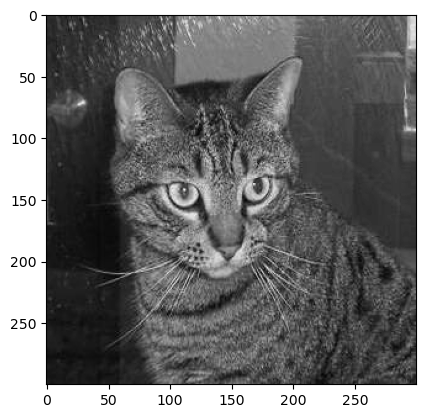

In [39]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = 'gist_gray')

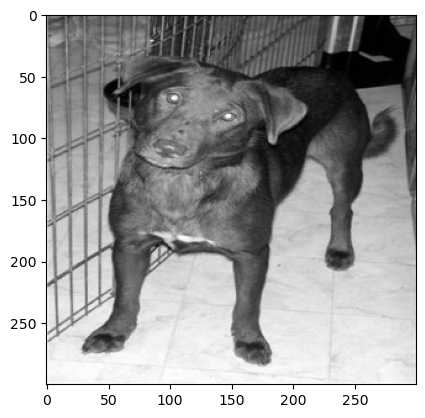

In [40]:
plt.imshow(X_train[50], cmap = 'gist_gray')

In [41]:
# Build the model

from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

model.fit(X_train, y_train, batch_size = 50, epochs = 5, verbose = 1)

Epoch 1/5
2/2 [==============================] - 5s 2s/step - loss: 0.8564 - accuracy: 0.5300
Epoch 2/5
2/2 [==============================] - 4s 2s/step - loss: 0.4241 - accuracy: 0.8800
Epoch 3/5
2/2 [==============================] - 4s 2s/step - loss: 0.2442 - accuracy: 0.9600
Epoch 4/5
2/2 [==============================] - 4s 2s/step - loss: 0.1243 - accuracy: 0.9900
Epoch 5/5
2/2 [==============================] - 4s 2s/step - loss: 0.0757 - accuracy: 1.0000


In [42]:
# Evaluate the model

loss, acc = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy:", acc)

Accuracy: 0.625
